# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [2]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

# **Sample Answer to Exercise 1**

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

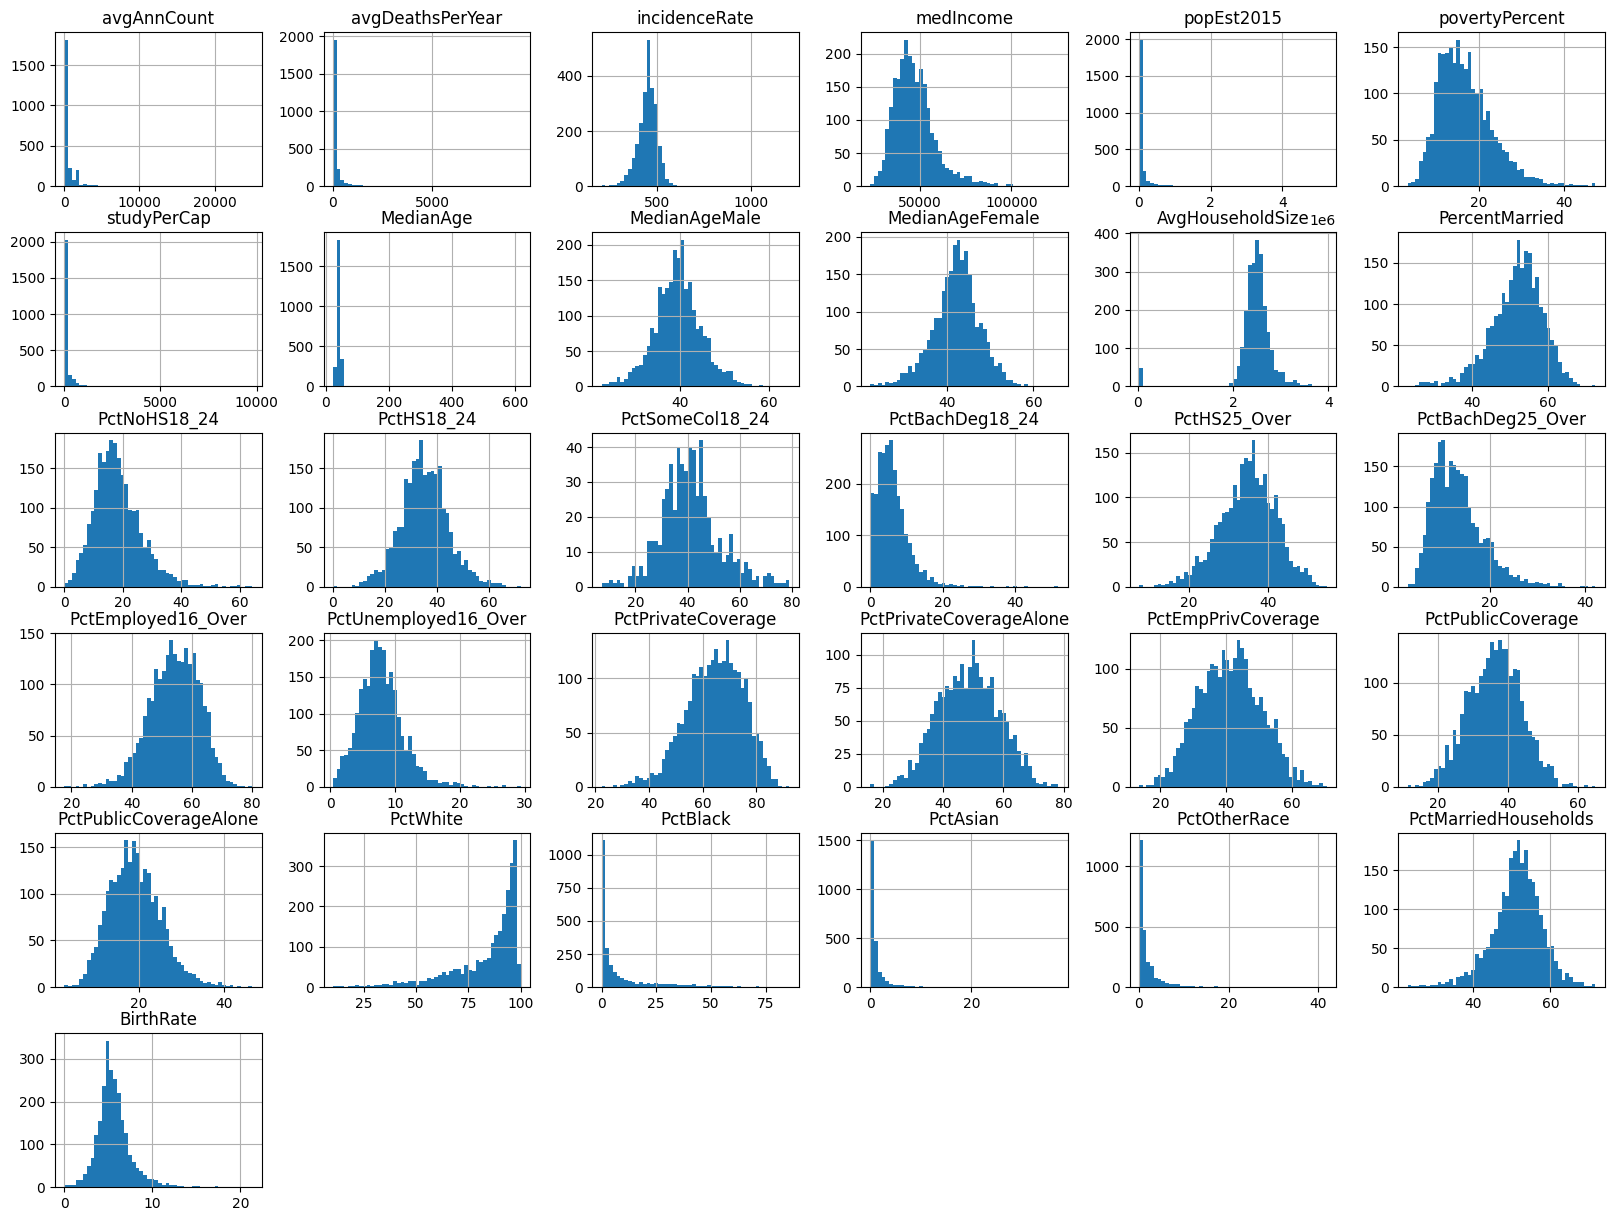

In [5]:
import matplotlib.pyplot as plt
TrainData = pd.read_csv(training_data_path)
TrainTargetData = pd.read_csv(training_targets_path)
# TrainData
# TrainTargetData
TrainData.hist(bins=50, figsize=(20,15))
plt.show()

In [35]:
data_dict = {"avgAnnCount": "Mean number of reported cases of cancer diagnosed annually",

"avgDeathsPerYear": "Mean number of reported mortalities due to cancer",

"incidenceRate": "Mean per capita (100,000) cancer diagoses",

"medianIncome": "Median income per county" ,

"popEst2015": "Population of county", 

"povertyPercent": "Percent of populace in poverty" ,

"MedianAge": "Median age of county residents", 

"MedianAgeMale": "Median age of male county residents" ,

"MedianAgeFemale": "Median age of female county residents" ,

"AvgHouseholdSize": "Mean household size of county" ,

"PercentMarried": "Percent of county residents who are married", 

"PctNoHS18_24": "Percent of county residents ages 18-24 highest education attained: less than high school" ,

"PctHS18_24": "Percent of county residents ages 18-24 highest education attained: high school diploma" ,

"PctSomeCol18_24": "Percent of county residents ages 18-24 highest education attained: some college" ,

"PctBachDeg18_24": "Percent of county residents ages 18-24 highest education attained: bachelor's degree" ,

"PctHS25_Over": "Percent of county residents ages 25 and over highest education attained: high school diploma" ,

"PctBachDeg25_Over": "Percent of county residents ages 25 and over highest education attained: bachelor's degree",

"PctEmployed16_Over": "Percent of county residents ages 16 and over employed" ,

"PctUnemployed16_Over": "Percent of county residents ages 16 and over unemployed" ,

"PctPrivateCoverage": "Percent of county residents with private health coverage" ,

"PctPrivateCoverageAlone": "Percent of county residents with private health coverage alone (no public assistance)" ,

"PctEmpPrivCoverage": "Percent of county residents with employee-provided private health coverage" ,

"PctPublicCoverage": "Percent of county residents with government-provided health coverage" ,

"PctPublicCoverageAlone": "Percent of county residents with government-provided health coverage alone" ,

"PctWhite": "Percent of county residents who identify as White" ,

"PctBlack": "Percent of county residents who identify as Black" ,

"PctAsian": "Percent of county residents who identify as Asian" ,

"PctOtherRace": "Percent of county residents who identify in a category which is not White, Black, or Asian" ,

"PctMarriedHouseholds": "Percent of married households" ,

"BirthRate": "Number of live births relative to number of women in county" }

In [37]:
# Many columns of data display percentage, and the range of percentage should be in 0-100.
# Thus, ranges should be checked that there is no outliers or not.
import numpy as np
def check_column_range(df, column_name):
    """
    Check if all values in a given column of a dataframe are between 0 and 100 (inclusive).
    Args:
        df: pandas DataFrame
            The dataframe to check.
        column_name: str
            The name of the column to check.
    Returns:
        bool
            True if all values in the column are between 0 and 100 (inclusive), False otherwise.
    """
    column_values = df[column_name]
    for x in column_values:
        if (0 <= x <= 100):
            return True
        else: 
            return x

# get columns' names of discription percentage 
key_list = []
for key, value in data_dict.items():
    if ("Percent" or  "per" or "Number of live births relative to number of women in county" ) in value:
        key_list.append(key)
# key_list   
judge = 1
for column in key_list:
    result = check_column_range(TrainData, column)
    if result!=True and np.isnan(result)==False:
        print("{} Column has an outlier {} exceeding normal range (0 to 100).".format(column,result))
        judge = 0
#     print(result)
if judge:
    print("There is no percentage data less than 0 and greater than 100!")

There is no percentage data less than 0 and greater than 100!


Text(0.5, 1.0, 'medIncome')

medIncome outliers：[ 77222  80650  76365  84026  75539  79857  73274 125635  88500  73413
  86419  74576  76269  74047  91886  92097  90039  80479  85886  74347
 100806 100511  74008  84686  76206  79173  77281  73981  80338  73788
  72972 106871  82048  74220 122641  97279  79576  80037  76856  76996
  78983  84213 110507  89106  81940  73750  83162  74967  75176  76104
  76489  87220  78653  89861  86610 103876 100194  75689  77764  75200
  92647  97219  79403  77364  82596  75122  75682  83152  91688  76661
  86654  83603  76061  84500  86354  76584  76512  78001  94334  77823
  90640  75920  83698  80631  85336  85885  98312 107143  73998  86703
  83788  75714  74341]


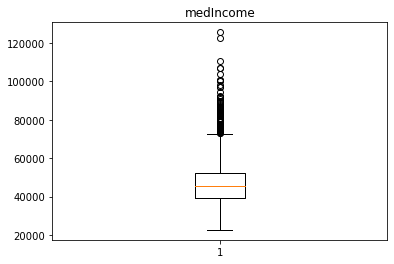

In [28]:
# check the medIncome column's outliers
# TrainData.boxplot(column=["medIncome"])
fig, ax = plt.subplots()
age = ax.boxplot(TrainData["medIncome"])
ax.set_title("medIncome")
outliers_medIncome = age["fliers"][0].get_ydata()
print(f"medIncome outliers：{outliers_medIncome}")

There is no data about income of each county, thus **medIncome** is supposed to be deemed reasonable as well as **popEst2015**  because of different classes and population distribution.

Text(0.5, 1.0, 'AvgHouseholdSize')

AvgHouseholdSize outliers：[0.0261 0.0222 0.0237 0.0249 0.024  0.023  0.026  0.0222 0.026  0.0248
 0.0251 0.027  0.0248 0.0248 0.0257 0.0253 0.0263 0.0225 0.0241 1.95
 1.97   0.0277 0.025  1.89   0.0249 0.0241 0.0254 0.0242 1.94   0.0243
 0.028  0.0277 0.0261 0.0248 1.93   0.0221 0.024  0.0248 0.0259 0.0242
 0.0245 0.026  0.0268 0.0239 0.0243 0.0268 0.0243 0.0271 0.0236 0.027
 0.0273 0.0242 1.86   0.0248 1.95   3.21   3.08   3.08   3.33   3.24
 3.24   3.26   3.11   3.62   3.07   3.75   3.57   3.36   3.02   3.17
 3.23   3.6    3.61   3.14   3.14   3.09   3.19   3.48   3.62   3.97
 3.35   3.2    3.38   3.93   3.78   3.32   3.29   3.27   3.3    3.18
 3.13   3.08   3.03   3.07   3.08   3.24   3.32   3.29   3.05   3.19
 3.67   3.05   3.56   3.59   3.04   3.07   3.06   3.04   3.28   3.04
 3.04   3.06   3.04   3.22   3.17   3.3    3.08   3.17   3.3    3.08
 3.48   3.51   3.02   3.16   3.08   3.36   3.26   3.33   3.03   3.02
 3.27   3.62   3.07   3.54   3.26   3.86   3.02   3.03   3.08   3.07
 

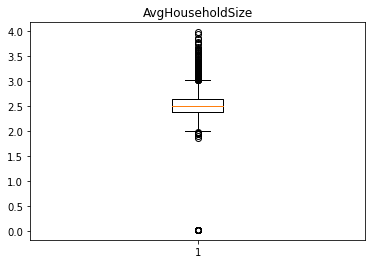

In [29]:
fig, ax = plt.subplots()
age = ax.boxplot(TrainData["AvgHouseholdSize"])
ax.set_title("AvgHouseholdSize")
outliersAvgHouseholdSize= age["fliers"][0].get_ydata()
print(f"AvgHouseholdSize outliers：{outliersAvgHouseholdSize}")

The **AvgHouseholdSize** shows some outilers are too big, but consider with some county with higher **medIncome**. It all seems to make sense. However, some outilers virtually **0**, no too low **medIncome** is found, thus they are outilers perhaps influencing pridicting accutacy.

According to the data from [Age Structure - Our World in Data](https://ourworldindata.org/age-structure), all countries' median age is blow 50 years old. Thus, the data of **MedianAge** column should be checked that is there some rows existing the outilers.

Text(0.5, 1.0, 'MedianAge')

MedianAge outliers：[55.1, 496.8, 458.4, 349.2, 502.8, 55.6, 430.8, 508.8, 412.8, 55.6, 406.8, 498.0, 55.4, 55.6, 56.5, 519.6, 511.2, 508.8, 424.8, 65.3, 470.4, 501.6, 496.8, 500.4, 53.7, 469.2, 56.3, 54.8, 57.3, 54.4, 54.4, 536.4, 523.2, 54.6, 535.2, 481.2, 619.2, 546.0, 57.1, 56.4, 54.0, 59.0, 579.6, 414.0]


<AxesSubplot:title={'center':'MedianAge'}>

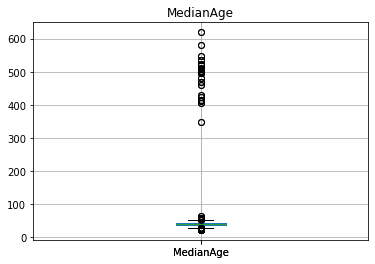

In [38]:
# check "MedianAge" column 
fig, ax = plt.subplots()
age = ax.boxplot(TrainData["MedianAge"])
ax.set_title("MedianAge")
outliers = age["fliers"][0].get_ydata()
outliers = [x for x in outliers if 50<=x or x<=0]
print(f"MedianAge outliers：{outliers}")
TrainData.boxplot(column=["MedianAge"])

For above outilers result, considered some county perhaps live more the elders, therefore **65.3** is regard as reasonable maximum. The remaining outliers over 100 years old can not be trusted.

{'whiskers': [<matplotlib.lines.Line2D at 0x198d450d9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x198d450df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x198d450d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x198d451b520>],
 'fliers': [<matplotlib.lines.Line2D at 0x198d451b7f0>],
 'means': []}

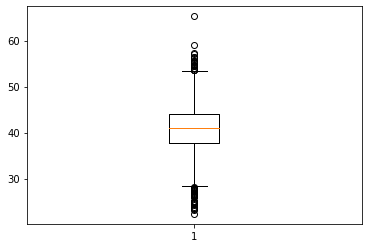

In [20]:
# Here displys more reasonable MedianAge
reasonable_median_age = TrainData[TrainData["MedianAge"]<=65.3]["MedianAge"]
fig, ax = plt.subplots()
ax.boxplot(reasonable_median_age)
plt.show()

It is can be seen that there is no totally unreasonable outilers in **MedianAgeMale** and **MedianAgeFemale**.

Text(0.5, 1.0, 'MedianAgeMale')

MedianAgeMale outliers：[52.4, 54.8, 53.2, 53.0, 52.4, 55.5, 52.4, 54.7, 54.4, 53.4, 58.6, 64.7, 53.1, 54.0, 55.8, 54.8, 56.2, 53.9, 54.0, 52.6, 52.9, 53.7, 53.8, 52.3, 52.8, 55.5, 58.5, 53.4, 60.2]


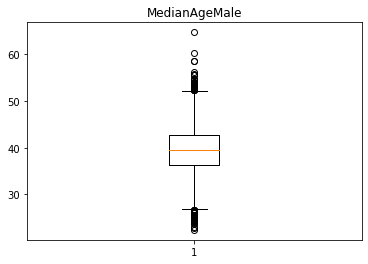

In [21]:
fig, ax = plt.subplots()
age = ax.boxplot(TrainData["MedianAgeMale"])
ax.set_title("MedianAgeMale")
outliersMale = age["fliers"][0].get_ydata()
outliersMale = [x for x in outliersMale if 50<=x or x<=0]
print(f"MedianAgeMale outliers：{outliersMale}")

Text(0.5, 1.0, 'MedianAgeFemale')

MedianAgeMale outliers：[54.9, 55.7, 55.6, 56.5, 56.1, 57.2, 55.0, 65.7, 56.8, 54.9, 58.0, 56.4, 55.3, 58.7, 59.6, 55.0, 55.5, 58.2]


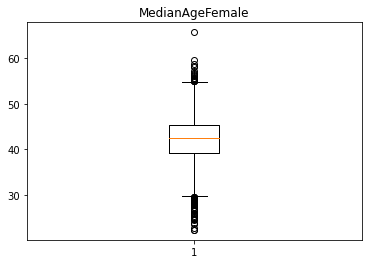

In [22]:
fig, ax = plt.subplots()
age = ax.boxplot(TrainData["MedianAgeFemale"])
ax.set_title("MedianAgeFemale")
outliersFemale = age["fliers"][0].get_ydata()
outliersFemale = [x for x in outliersFemale if 50<=x or x<=0]
print(f"MedianAgeMale outliers：{outliersFemale}")

In [256]:
# seek how many data is null.
null_counts = TrainData.isnull().sum()
for index, value in enumerate(null_counts):
    if value!=0:
        print("The column {} has {} rows with null values.".format(null_counts.keys()[index],value))

The column PctSomeCol18_24 has 1829 rows with null values.
The column PctEmployed16_Over has 119 rows with null values.
The column PctPrivateCoverageAlone has 483 rows with null values.


Based on above results, **PctSomeCol18_24** has **1829** rows with null values, obviously this column exists serious outilers.

In [33]:
# According to the bar charts, "studyPerCap" is seems to exist too many zero value
zero_counts = TrainData.apply(lambda x: (x == 0).sum())
print(zero_counts)

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                1548
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  2
PctHS18_24                    1
PctSomeCol18_24               0
PctBachDeg18_24              90
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over            0
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone       0
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                     59
PctAsian                    158
PctOtherRace                115
PctMarriedHouseholds          0
BirthRate                     3
dtype: i

It turns out that **studyPerCap** has **1548 zeros** compared to anything else, which is not an acceptable number of outliers.

In [51]:
# Calculate the correlation matrix
correlation_matrix = TrainData.corrwith(TrainTargetData['TARGET_deathRate'])
# Sort by correlation strength
correlation_matrix = correlation_matrix.sort_values(ascending=False)
# Output the top five features most correlated with the target variable
print(correlation_matrix.head(5))

incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
povertyPercent            0.413260
PctHS25_Over              0.409915
PctPublicCoverage         0.391899
dtype: float64


Text(0.5, 0.5, '0.02')

Text(0.5, 0.5, '-0.01')

Text(0.5, 0.5, '0.11')

Text(0.5, 0.5, '0.03')

Text(0.5, 0.5, '0.79')

Text(0.5, 0.5, '0.29')

Text(0.5, 0.5, '0.86')

Text(0.5, 0.5, '0.19')

Text(0.5, 0.5, '0.64')

Text(0.5, 0.5, '0.42')

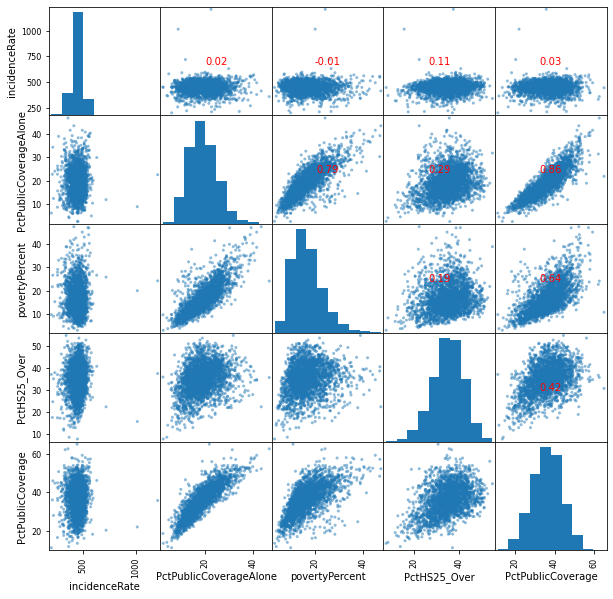

In [75]:
# Calculate the correlation matrix
corr_matrix = TrainData[top_five_features].corr()

# Draw a scatter matrix plot with correlation coefficients
scatter_matrix = pd.plotting.scatter_matrix(TrainData[top_five_features], figsize=(10,10))

for i, j in zip(*plt.np.triu_indices_from(scatter_matrix, k=1)):
    ax = scatter_matrix[i,j]
    ax.text(0.5, 0.5, "{:.2f}".format(corr_matrix.iloc[i,j]), ha='center', va='center', transform=ax.transAxes, color='red')

plt.show()

### According to the scatterplot and correlation coefficients
* **incidenceRate**  is independent and does not see any correlation with the other four data.
* Although **PctHS25_Over**  shows a certain correlation with the other three except **incidenceRate**, the distribution of points does not show a stable law. There is no way to get a relatively accurate linear correlation. While **PctHS25_Over**  grows as the remaining three grow, the scatters are very broad and correlation coefficients are low, respectively 0.29, 0.19, and 0.42, so **PctHS25_Over** can only be described as a weak correlation with **povertyPercent** and **PctPublicCoverageAlone**, but median correlation with **PctPublicCoverage**.
* And **PctPublicCoverage** does show a median correlation for **povertyPercent** (0.64) and **PctHS25_Over** (0.42), but it is strong correlated for **PctPublicCoverageAlone** (0.86).
* Compared with others, **PctPublicCoverageAlone** show a stronger positive correlation with **PctPublicCoverage** (0.86)and **povertyPercent** (0.79) , and as one increases, the two other also increase. However, it only weakly correlate for **PctHS25_Over** (0.29).

In [48]:
# recall discriptions of data dictionary
data_dict["incidenceRate"]
data_dict["PctHS25_Over"]
data_dict["PctPublicCoverage"]
data_dict["PctPublicCoverageAlone"]
data_dict["povertyPercent"]

'Mean per capita (100,000) cancer diagoses'

'Percent of county residents ages 25 and over highest education attained: high school diploma'

'Percent of county residents with government-provided health coverage'

'Percent of county residents with government-provided health coverage alone'

'Percent of populace in poverty'

Reviewing the description of the above five factors in the data dictionary can further support the above conclusion: **populace in poverty is indeed more likely to have only the health insurance provided by the government**.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data.

# **Sample Answer to Exercise 2**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocess training data
TrainData_processed = preprocessing_pipeline.fit_transform(TrainData)

# Preprocess target data
TrainTargetData_processed = TrainTargetData.values.ravel()

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above.


# **Sample Answer to Exercise 3**

The code in the cell below uses the **LassoCV** and **RidgeCV** methods to evaluate the incoming list of alpha values [0.001, 0.01, 0.1, 1, 10, 100, 1000] by using **cross-validation**. LassoCV and RidgeCV will **select the alpha value with the smallest mean square error as the best regularization weight**, and then use this weight to build the Lasso and Ridge models, and calculate the mean square error of the model.

In [60]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import *


# Build a linear regression model
linear_regression = LinearRegression()
linear_scores = -cross_val_score(linear_regression, TrainData_processed, TrainTargetData_processed, cv=5, scoring="neg_mean_squared_error")
linear_rmse_scores = np.sqrt(linear_scores)

# Establish a Lasso model and use LassoCV to select the regularization parameter alpha
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5)
lasso_cv.fit(TrainData_processed, TrainTargetData_processed)
best_alpha_lasso = lasso_cv.alpha_
lasso_regression = Lasso(alpha=best_alpha_lasso)
lasso_scores = -cross_val_score(lasso_regression, TrainData_processed, TrainTargetData_processed, cv=5, scoring="neg_mean_squared_error")
lasso_rmse_scores = np.sqrt(lasso_scores)

# Build a Ridge model and use RidgeCV to select the regularization parameter alpha
ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5)
ridge_cv.fit(TrainData_processed, TrainTargetData_processed)
best_alpha_ridge = ridge_cv.alpha_
ridge_regression = Ridge(alpha=best_alpha_ridge)
ridge_scores = -cross_val_score(ridge_regression, TrainData_processed, TrainTargetData_processed, cv=5, scoring="neg_mean_squared_error")
ridge_rmse_scores = np.sqrt(ridge_scores)

# Output root mean square error (RMSE) score
print("Linear Regression RMSE scores:", linear_rmse_scores)
print("Linear Regression RMSE mean:", linear_rmse_scores.mean())
print("Lasso Regression RMSE scores:", lasso_rmse_scores)
print("Lasso Regression RMSE mean:", lasso_rmse_scores.mean())
print("Best alpha for Lasso:", best_alpha_lasso)
print("Ridge Regression RMSE scores:", ridge_rmse_scores)
print("Ridge Regression RMSE mean:", ridge_rmse_scores.mean())
print("Best alpha for Ridge:", best_alpha_ridge)


LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
        cv=5)

Linear Regression RMSE scores: [20.02262554 19.28533615 18.98725351 20.01877686 18.57849218]
Linear Regression RMSE mean: 19.378496848048925
Lasso Regression RMSE scores: [19.911829   19.40902168 19.02811672 19.87143195 18.58937516]
Lasso Regression RMSE mean: 19.36195490109936
Best alpha for Lasso: 0.1
Ridge Regression RMSE scores: [19.94746741 19.3127588  18.99271061 19.9770259  18.5783953 ]
Ridge Regression RMSE mean: 19.361671602279074
Best alpha for Ridge: 10.0


The Lasso and Ridge regularized models performed similarly and slightly better than the simple linear regression model according to the RMSE evaluation metric. In addition, although the RMSE value of Lasso is slightly higher than that of Ridge (insignificantly), Lasso regression selects a smaller alpha, which means it selects fewer features. This is more practical for explaining influence factors and better generalization ability. 

**In summary, Lasso is the best model.**

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance.

In [61]:
from sklearn.linear_model import Lasso

# Fit Lasso model with best alpha on TrainData
lasso = Lasso(alpha=0.1)
lasso.fit(TrainData_processed, TrainTargetData_processed)

# Get feature importances
feature_importances = dict(zip(TrainData.columns, lasso.coef_))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True)

# Print top 5 feature importances
print("Top 5 most important features:")
for feature, importance in sorted_feature_importances[:5]:
    print(f"{feature}: {importance:.4f}")

Lasso(alpha=0.1)

Top 5 most important features:
incidenceRate: 10.7551
PctBachDeg25_Over: -6.8979
PctPrivateCoverage: -6.2533
PctMarriedHouseholds: -5.7928
PercentMarried: 4.8785


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? 

# **Sample Answers for Exercise 5**

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define Ridge Regression model with best alpha
lasso = Lasso(alpha=0.1)

# Define Random Forest Regression model with default hyperparameters
rf = RandomForestRegressor()

# Evaluate Ridge Regression using cross-validation
lasso_scores = -cross_val_score(lasso_regression, TrainData_processed, TrainTargetData_processed, cv=5, scoring="neg_mean_squared_error")
lasso_rmse = np.sqrt(lasso_scores.mean())
lasso_mae = -cross_val_score(lasso, TrainData_processed, TrainTargetData_processed, scoring='neg_mean_absolute_error', cv=5).mean()

# Evaluate Random Forest Regression using cross-validation
rf_scores = -cross_val_score(rf, TrainData_processed, TrainTargetData_processed, scoring='neg_mean_squared_error', cv=5)
rf_rmse = np.sqrt(rf_scores.mean())
rf_mae = -cross_val_score(rf, TrainData_processed, TrainTargetData_processed, scoring='neg_mean_absolute_error', cv=5).mean()

print("Lasso Regression RMSE: {:.4f}".format(lasso_rmse))
print("Random Forest Regression RMSE: {:.4f}".format(rf_rmse))
print("Lasso Regression MAE: {:.4f}".format(lasso_mae))
print("Random Forest Regression MAE: {:.4f}".format(rf_mae))

Lasso Regression RMSE: 19.3685
Random Forest Regression RMSE: 18.8479
Lasso Regression MAE: 14.2976
Random Forest Regression MAE: 13.7383


In [94]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_split': [2, 5, 8,10,15],
               'min_samples_leaf': [1, 2, 3, 4, 5],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(TrainData_processed, TrainTargetData_processed)
print(rf_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 8, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}


In [98]:
rf_best = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 110, bootstrap = True)
# r_f = rf_best.fit(TrainData_processed, TrainTargetData_processed)
# random_accuracy_train = evaluate(rf_best,TrainData_processed, TrainTargetData_processed)
# random_accuracy_test = evaluate(rf_best, X_test, y_test_arr)
# print("Accuracy of the Training Model After:",round(random_accuracy_train,2))
# print("Accuracy of the Testing Model After:",round(random_accuracy_test,2))

rf_scores = -cross_val_score(rf_best, TrainData_processed, TrainTargetData_processed, cv=5, scoring="neg_mean_squared_error")
rf_rmse_scores = np.sqrt(rf_scores)
rf_mae = -cross_val_score(rf, TrainData_processed, TrainTargetData_processed, scoring='neg_mean_absolute_error', cv=5).mean()
print("Random Forest Regression RMSE: {:.4f}".format(rf_rmse))
print("Random Forest Regression MAE: {:.4f}".format(rf_mae))

Random Forest Regression RMSE: 18.8479
Random Forest Regression MAE: 13.8227


In [100]:
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()
rf_best.fit(TrainData_processed, TrainTargetData_processed)
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 5 most important features:")
for f in range(5):
    print("%d. %s: %f" % (f+1, TrainData.columns[indices[f]], importances[indices[f]]))

RandomForestRegressor(max_depth=110, min_samples_leaf=2, n_estimators=400)

Top 5 most important features:
1. PctBachDeg25_Over: 0.226147
2. incidenceRate: 0.208853
3. PctHS25_Over: 0.046676
4. medIncome: 0.043360
5. PctPublicCoverageAlone: 0.036295


Both of **PctBachDeg25_Over** and **incidenceRate** are two most significant features in both the Lasso model and the Random Forest regressor, though the orders are different. Lasso model shows **PctPrivateCoverage** is a meaningful influence factor, if people with private health insurance except government provided, private one, to some extent, can reduce the results. And the rest two features, **PctMarriedHouseholds** and **PercentMarried** reveal marriage with correaltion for death. On the other hands, **PctHS25_Over** in Random Forest regressor displays education influence cancer death ratio as well. Besides, **medIncome** and **PctPublicCoverageAlone** are related to finance, perhaps higher income families have extra money to pay private health insurance and more adavanced, but expensive, treatment. It means death is also related to the family finance.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data.

In [3]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define and train the model
model = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 110, bootstrap = True)
model.fit(TrainData_processed, TrainTargetData_processed)

# Preprocess training data
test_data = preprocessing_pipeline.fit_transform(test_data)

# Preprocess target data
test_targets = test_targets

# Make predictions on test data
test_pred = model.predict(test_data)

# Calculate mean squared error (MSE)
mse = mean_squared_error(test_targets, test_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(test_targets, test_pred, squared=False)

print(f'Random Forest Regression MSE: {mse}')
print(f'Random Forest Regression RMSE: {rmse}')



RandomForestRegressor(max_depth=110, min_samples_leaf=2, n_estimators=400)

Random Forest Regression MSE: 448.0691812475979
Random Forest Regression RMSE: 21.167644678792158


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set 
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics 



In [11]:
model = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 110, bootstrap = True)
model.fit(TrainData_processed, TrainTargetData_processed)
def  evaluate(data,targets):
    pred = model.predict(data)
    mse = mean_squared_error(targets, pred)
    rmse = mean_squared_error(targets, pred, squared=False)
    print(f'Random Forest Regression MSE: {mse}')
    print(f'Random Forest Regression RMSE: {rmse}')

test_data = preprocessing_pipeline.fit_transform(test_data)
test_targets = test_targets

evaluate(test_data,test_targets)

RandomForestRegressor(max_depth=110, min_samples_leaf=2, n_estimators=400)

Random Forest Regression MSE: 442.92046207948744
Random Forest Regression RMSE: 21.045675614707346


# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately 

In [12]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'

array([[<AxesSubplot:title={'center':'AgeAtHeartAttack'}>,
        <AxesSubplot:title={'center':'PericardialEffusion'}>],
       [<AxesSubplot:title={'center':'FractionalShortening'}>,
        <AxesSubplot:title={'center':'epss'}>],
       [<AxesSubplot:title={'center':'lvdd'}>,
        <AxesSubplot:title={'center':'WallMotionIndex'}>]], dtype=object)

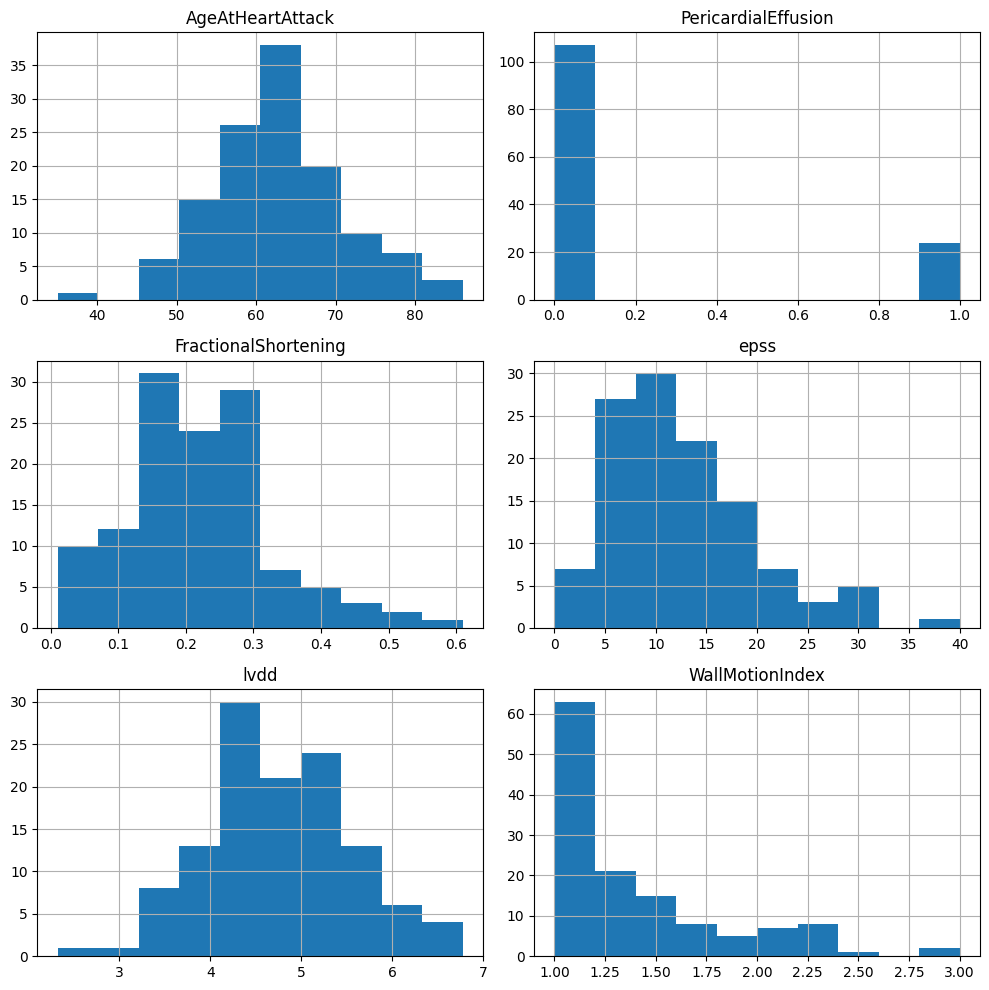

In [13]:
# read in data
data = pd.read_csv(data_features_path)
targets = pd.read_csv(data_targets_path)

# plot histograms of all features to identify outliers
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [20]:
# seek how many data is null.
null = data.isnull().sum()
for index, value in enumerate(null):
    if value!=0:
        print("The column {} has {} rows with null values.".format(null.keys()[index],value))
# use median to fill null value
data = data.fillna(data.median())

The column AgeAtHeartAttack has 5 rows with null values.
The column FractionalShortening has 7 rows with null values.
The column epss has 14 rows with null values.
The column lvdd has 10 rows with null values.
The column WallMotionIndex has 1 rows with null values.


# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

pipeline.fit(data, targets.values.ravel())

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. 

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a machine learning pipeline without regularization.
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='none', solver='saga'))
])

# Create a machine learning pipeline with L1 regularization.
pipeline_l1 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='saga'))
])

# Create a machine learning pipeline with L2 regularization.
pipeline_l2 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2', solver='saga'))
])


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
# Define the hyperparameter search space.
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# create GridSearchCV 
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search_l1 = GridSearchCV(pipeline_l1, param_grid, cv=5)
grid_search_l2 = GridSearchCV(pipeline_l2, param_grid, cv=5)

# Fit a GridSearchCV object.
grid_search.fit(data, targets.values.ravel())
grid_search_l1.fit(data, targets.values.ravel())
grid_search_l2.fit(data, targets.values.ravel())

# Compute cross-validation scores.
scores = cross_val_score(grid_search.best_estimator_, data, targets.values.ravel(), cv=5)
scores_l1 = cross_val_score(grid_search_l1.best_estimator_, data, targets.values.ravel(), cv=5)
scores_l2 = cross_val_score(grid_search_l2.best_estimator_, data, targets.values.ravel(), cv=5)

# Output the best hyperparameters.
print("Best alpha for none regularization:", grid_search.best_params_['classifier__C'])
print("Best alpha for L1 regularization:", grid_search_l1.best_params_['classifier__C'])
print("Best alpha for L2 regularization:", grid_search_l2.best_params_['classifier__C'])



print(f"No regularization: Mean score = {scores.mean():.3f}")
print(f"L1 regularization: Mean score = {scores_l1.mean():.3f}")
print(f"L2 regularization: Mean score = {scores_l2.mean():.3f}")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(penalty='l1',
                                                           solver='saga'))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

Best alpha for none regularization: 0.1
Best alpha for L1 regularization: 0.1
Best alpha for L2 regularization: 0.1
No regularization: Mean score = 0.724
L1 regularization: Mean score = 0.718
L2 regularization: Mean score = 0.724


According to the output, it can be seen that **no regularization and L2 regularization** achieve similar results. The advantages and disadvantages of the two are explained below: 
#### Model without regularization:
* Pros:

The model without regularization is usually easier to interpret and understand since it does not introduce any additional constraints on the model parameters.
It can be useful when the dataset is relatively small, and overfitting is not a concern, or when the complexity of the model is low.
* Cons:

Without any regularization, the model may be more prone to overfitting, especially when the dataset is large or complex.
It may also be less effective in handling multicollinearity among the predictor variables.


#### Model with L2 regularization:

* Pros:

L2 regularization can help prevent overfitting by adding a penalty term to the loss function, which encourages the model parameters to have smaller values and reduces their variance.
It can handle multicollinearity by shrinking the coefficients of highly correlated features towards each other.
L2 regularization is relatively computationally efficient and has a closed-form solution.
* Cons:

L2 regularization may not be as effective as L1 regularization in producing sparse models, which can be a disadvantage if the goal is to select a subset of important features.
The effectiveness of L2 regularization can depend on the choice of the regularization parameter (alpha), and finding the optimal value can require some trial and error.
#### Overall, both models have their strengths and weaknesses, and the choice between them depends on the specific requirements and characteristics of the dataset. Since the dataset used here is small, no regularization should be the better model.

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model.

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter space.
param_grid = {'n_estimators': [100, 200, 400],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 30, 50, 70, 90, 110, None],
               'min_samples_split': [2, 5, 8,10,15],
               'min_samples_leaf': [1, 2, 3, 4, 5]}



# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit data
grid_search.fit(data, targets.values.ravel())

scores = cross_val_score(grid_search.best_estimator_, data, targets.values.ravel(), cv=5)

# output best parameter
print("Best parameters: {}".format(grid_search.best_params_))

# output best score
print(f"Random Forest Classifier Mean score = {scores.mean():.3f}")

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 30, 50, 70, 90, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 8, 10, 15],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Classifier Mean score = 0.709


According to the results of the optimal parameters of the model **Random Forest Classifier Mean score = 0.709**, compare the results of the **no regularized model with 0.724**. **The model without regularization may be a better fit for the dataset**, especially if the data is relatively simple and the relationships between the features and the target variable are well-defined.

In [53]:
# print the top five most important/relevant features identified using the Random Forest model.

importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
top_five = data.columns[indices][:5]

print("Top Five Features and Their Importance Scores:")
for i in range(5):
    print("%d. Feature: %s, Importance Score: %f" % (i+1, top_five[i], importances[indices[i]]))


Top Five Features and Their Importance Scores:
1. Feature: WallMotionIndex, Importance Score: 0.323896
2. Feature: AgeAtHeartAttack, Importance Score: 0.183413
3. Feature: epss, Importance Score: 0.164379
4. Feature: lvdd, Importance Score: 0.146986
5. Feature: FractionalShortening, Importance Score: 0.138036
